# 리그오브레전드 마스터랭크게임 첫 15분 데이터를 이용한 승리예측

## 데이터 설명

In [59]:
import pandas as pd

df = pd.read_csv('./lolmaster.csv')

데이터의 특성은 수집과정에서 들어간 Unamed를 제외한 각 팀의 경험치, 획득골드, 미니언 처치 수, 정글 몬스터 처치 수, 라인별 획득 골드, 라인별 획득 경험치등

In [60]:
df.info()
df = df.drop(['blueTopGold', 'blueMidGold', 'blueJugGold', 'blueSupGold', 'blueAdGold', 
              'redTopGold', 'redMidGold', 'redJugGold', 'redSupGold', 'redAdGold',
              'blueTopXp', 'blueMidXp', 'blueJugXp', 'blueSupXp', 'blueAdXp',
              'redTopXp', 'redMidXp', 'redJugXp', 'redSupXp', 'redAdXp',
              'gameId'
             ], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64982 entries, 0 to 64981
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  64982 non-null  int64  
 1   gameId                      64982 non-null  int64  
 2   blueWins                    64982 non-null  int64  
 3   blueTotalGolds              64982 non-null  int64  
 4   blueCurrentGolds            64982 non-null  int64  
 5   blueTotalLevel              64982 non-null  int64  
 6   blueAvgLevel                64982 non-null  float64
 7   blueTotalMinionKills        64982 non-null  int64  
 8   blueTotalJungleMinionKills  64982 non-null  int64  
 9   blueFirstBlood              64982 non-null  int64  
 10  blueKill                    64982 non-null  int64  
 11  blueDeath                   64982 non-null  int64  
 12  blueAssist                  64982 non-null  int64  
 13  blueWardPlaced              649

In [61]:
df.head(5)

,Unnamed: 0,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,0,23613,2713,42,8.4,398,101,1,1,...,[],1,0,1,0,0,1,['AIR_DRAGON'],1,0
1,0,0,23800,5315,45,9.0,417,78,0,4,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
2,0,1,25353,1933,45,9.0,333,90,0,12,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
3,0,1,29129,4804,47,9.4,341,80,1,19,...,[],0,0,0,0,0,0,[],0,0
4,0,0,25991,2915,46,9.2,327,62,1,11,...,['BOT_LANE'],1,0,0,1,0,0,[],0,0


### 각 특성간 상관관계
각 특성간 상관관계를 살펴보자
특성이 너무 많으므로 블루팀에 대해서만 보자

In [66]:
blue_data = df.drop([
    'redWins', 'redTotalGolds', 'redCurrentGolds', 'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
    'redTotalJungleMinionKills','redFirstBlood','redKill','redDeath', 'redAssist', 'redWardPlaced', 'redWardKills',
    'redFirstTower', 'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills','redMidTowerKills', 'redTopTowerKills',
    'redBotTowerKills', 'redInhibitor', 'redFirstDragon', 'redDragnoType', 'redDragon', 'redRiftHeralds'
                    ], axis=1)

In [67]:
blue_data

,Unnamed: 0,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,0,23613,2713,42,8.4,398,101,1,1,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
1,0,0,23800,5315,45,9.0,417,78,0,4,...,[],0,0,0,0,0,0,[],0,1
2,0,1,25353,1933,45,9.0,333,90,0,12,...,[],0,0,0,0,0,1,['EARTH_DRAGON'],1,0
3,0,1,29129,4804,47,9.4,341,80,1,19,...,['MID_LANE'],2,2,0,0,0,1,"['WATER_DRAGON', 'AIR_DRAGON']",2,1
4,0,0,25991,2915,46,9.2,327,62,1,11,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,0,1,26759,2184,43,8.6,316,76,0,11,...,[],1,0,1,0,0,0,[],0,1
64978,0,1,43779,5104,68,13.6,143,0,1,26,...,[],2,2,0,0,0,0,[],0,0
64979,0,0,20609,4724,41,8.2,256,66,0,5,...,[],0,0,0,0,0,0,[],0,0
64980,0,0,20638,3678,40,8.0,284,53,1,7,...,[],0,0,0,0,0,0,[],0,0


<AxesSubplot:>

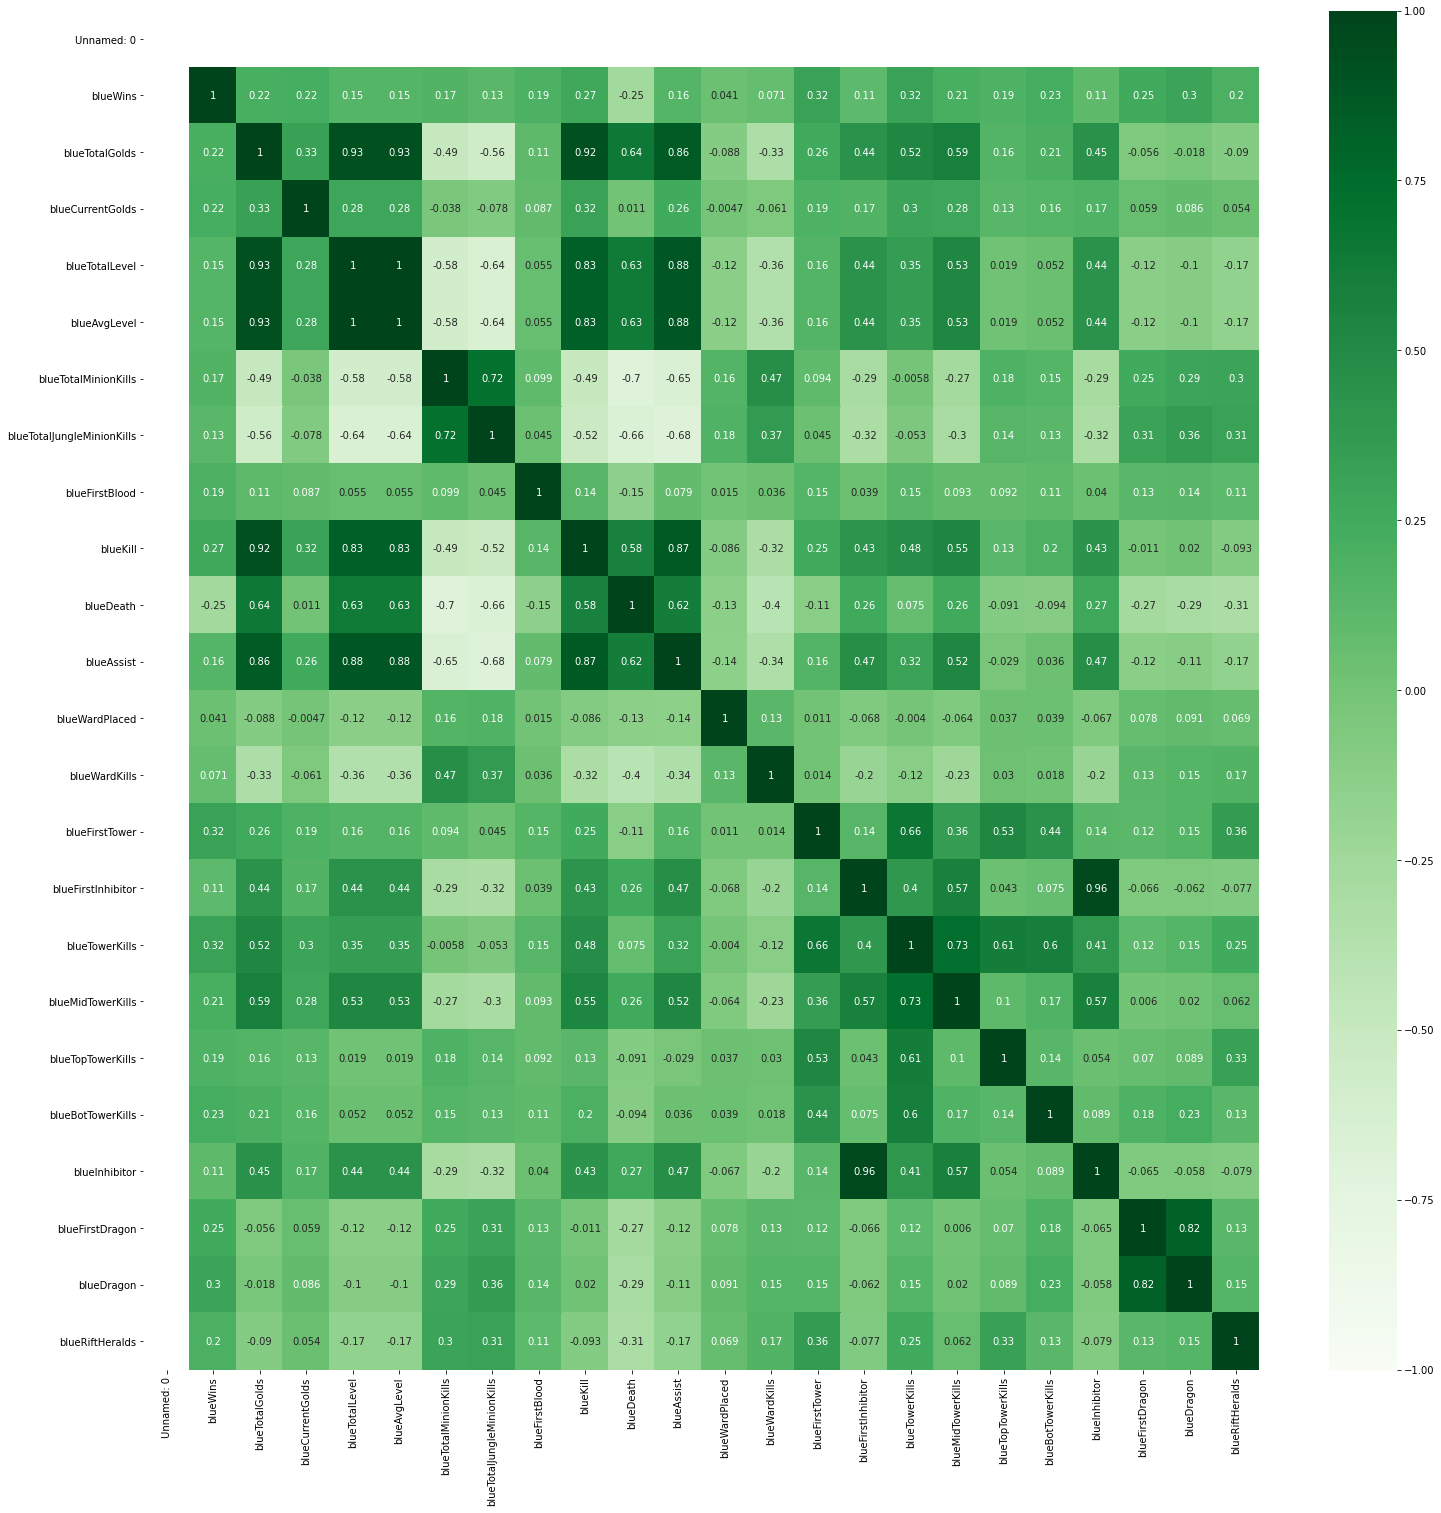

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_df = blue_data.drop(['Unnamed: 0'], axis=1)

fig = plt.figure(figsize=(25, 25))
sns.heatmap(blue_data.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1,)

## 데이터 전처리

비록 RIot api로 받아온 데이터를 한 번 전처리한 데이터지만 아직 모델에 쓰기엔 적합하지 않으므로 전처리 과정이 더 필요하다.
- gameId는 학습에 필요하지 않으므로 제거
- blueWin을 레이블로 사용한다.
    - blue팀 승리 : 1
    - red팀 승리 : 0
- 각 팀의 DragonType은 문자열로 처치한 용의 종류들을 작성해놓았기 때문에 학습에 사용할 수 없다 따라서 다음 column들을 추가한다.
    - {team}AirDragon
    - {team}EarthDragon
    - {team}FireDragon
    - {team}WaterDragon
- 각 팀의 처음 파괴한 포탑의 라인도 문자열로 주어졌기 때문에 어떤 라인의 타워를 먼저 파괴했는지 다음과 같이 column을 추가한다. 각 column이 1인경우 해당 라인의 포탑을 먼저 파괴한것이다.
    - {team}FirstTowerTop
    - {team}FirstTowerMid
    - {team}FirstTowerBot
    

In [70]:
# Blue 승리를 레이블로 사용 blue팀 승리 : 1, red팀 승리 : 0
df_y = df['blueWins']  
df_x = df.drop(['Unnamed: 0', 'blueWins', 'redWins'], axis=1)

### 1. 각 팀의 Dragon 타입을 숫자로 바꿔주기
- 각 팀이 잡은 드래곤의 종류가 string형태로 주어졌기 때문에 이를 숫자로 바꿔줘야한다.
- 드래곤 타입에 따라 0, 1, 2, 3과 같은 형태로 주게되면 종류마다 가중치가 주어지는 효과가 나타날 수 있으므로 각 용마다 column을 생성해서 해당 종류를 잡은 횟수를 기록한다.

In [71]:
#  각 팀의 Dragon 타입이 string으로 주어졌기 떄문에 column을 새로 만들어서 int형으로 만든다.
df['blueDragnoType'].unique()

array(['[]', "['EARTH_DRAGON']", "['WATER_DRAGON', 'AIR_DRAGON']",
       "['AIR_DRAGON']", "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']", "['WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']", "['AIR_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON']",
       "['EARTH_DRAGON', 'WATER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON', 'FIRE_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON', 'AIR_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON', 'FIRE_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON', 'EARTH_DRAGON', 'EARTH_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_

In [72]:
# 잡은 용의 타입이 배열형태가 아닌 하나의 string 형태이기 때문에 토큰화 한 후 각 컬럼에 할당해줘야 한다.
import re

def preprocessing_dragon(df, team='blue'):
    # 각 팀의 용 종류별 잡은 횟수 column 추가
    df[f'{team}AirDragon'] = 0
    df[f'{team}EarthDragon'] = 0
    df[f'{team}FireDragon'] = 0
    df[f'{team}WaterDragon'] = 0
    
    for i, dragon in enumerate(df[f'{team}DragnoType']):
        dragonReg = re.sub('[\'\[\]]', '', dragon)
        for res in dragonReg.split(', '):
            if (res == 'AIR_DRAGON'):
                df[f'{team}AirDragon'][i] += 1
            elif (res == 'EARTH_DRAGON'):
                df[f'{team}EarthDragon'][i] += 1
            elif (res == 'FIRE_DRAGON'):
                df[f'{team}FireDragon'][i] += 1
            elif (res == 'WATER_DRAGON'):
                df[f'{team}WaterDragon'][i] += 1 
    return df.drop([f'{team}DragnoType'], axis=1)

### 2. 각 팀의 처음 파괴한 포탑의 라인을 숫자로 바꿔주기
- 드래곤과 마찬가지로 string형태로 주어졌다.
- Top, Mid, Bot에 각각 1, 2, 3을 주게 된다면 마찬가지로 가중치가 주어지는것과 같은 효과가 나타날 수 있으므로 각 라인에 대한 컬럼을 추가한다.

In [73]:
df['blueFirstTowerLane'].unique()

array(["['TOP_LANE']", '[]', "['MID_LANE']", "['BOT_LANE']"], dtype=object)

In [74]:
# 처음 파괴한 포탑에 대한 전처리
def preprocessing_tower(df, team='blue'):
    df[f'{team}FirstTowerTop'] = 0
    df[f'{team}FirstTowerMid'] = 0
    df[f'{team}FirstTowerBot'] = 0
    
    for i, lane in enumerate(df[f'{team}FirstTowerLane']):
        towerReg = re.sub('[\'\[\]]', '', lane)
        if (towerReg == 'TOP_LANE'):
            df[f'{team}FirstTowerTop'][i] = 1
        elif (towerReg == 'MID_LANE'):
            df[f'{team}FirstTowerMid'][i] = 1
        elif (towerReg == 'BOT_LANE'):
            df[f'{team}FirstTowerBot'][i] = 1
    return df.drop([f'{team}FirstTowerLane'], axis=1)

In [75]:
df_x = preprocessing_dragon(df_x, team='blue')
df_x = preprocessing_dragon(df_x, team='red')
df_x = preprocessing_tower(df_x, team='blue')
df_x = preprocessing_tower(df_x, team='red')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [76]:
df_x.head(5)

,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,blueAssist,...,redAirDragon,redEarthDragon,redFireDragon,redWaterDragon,blueFirstTowerTop,blueFirstTowerMid,blueFirstTowerBot,redFirstTowerTop,redFirstTowerMid,redFirstTowerBot
0,23613,2713,42,8.4,398,101,1,1,8,3,...,1,0,0,0,1,0,0,0,0,0
1,23800,5315,45,9.0,417,78,0,4,6,4,...,1,0,0,0,0,0,0,0,0,0
2,25353,1933,45,9.0,333,90,0,12,6,18,...,0,0,0,0,0,0,0,1,0,0
3,29129,4804,47,9.4,341,80,1,19,3,22,...,0,0,0,0,0,1,0,0,0,0
4,25991,2915,46,9.2,327,62,1,11,7,13,...,0,0,0,0,0,0,0,0,0,1


### 특성 변경 후
특성의 개수가 77개가 되었다

In [77]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64982 entries, 0 to 64981
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blueTotalGolds              64982 non-null  int64  
 1   blueCurrentGolds            64982 non-null  int64  
 2   blueTotalLevel              64982 non-null  int64  
 3   blueAvgLevel                64982 non-null  float64
 4   blueTotalMinionKills        64982 non-null  int64  
 5   blueTotalJungleMinionKills  64982 non-null  int64  
 6   blueFirstBlood              64982 non-null  int64  
 7   blueKill                    64982 non-null  int64  
 8   blueDeath                   64982 non-null  int64  
 9   blueAssist                  64982 non-null  int64  
 10  blueWardPlaced              64982 non-null  int64  
 11  blueWardKills               64982 non-null  int64  
 12  blueFirstTower              64982 non-null  int64  
 13  blueFirstInhibitor          649

## 데이터 분배
학습 데이터와 검증 데이터를 셔플 후 8:2로 나누겠다.

In [81]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

### Feature scaling
- 원활한 학습을 위해 데이터를 작게 스케일링 해주자.
- 본 실험에선 Min Max Scaling을 사용하겠다.

In [82]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [83]:
mm_train_x = mms.fit_transform(train_x)
mm_test_x = mms.fit_transform(test_x)

## Model Building
데이터 처리는 끝났으니 이제 모델링을 해보자

In [84]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard
import tensorflow_addons as tfa  # for adamw

In [90]:
num_features = train_x.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1, 256)            15104     
_________________________________________________________________
batch_normalization_27 (Batc (None, 1, 256)            1024      
_________________________________________________________________
activation_24 (Activation)   (None, 1, 256)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 1, 256)            65792     
_________________________________________________________________
batch_normalization_28 (Batc (None, 1, 256)            1024      
_________________________________________________________________
activation_25 (Activation)   (None, 1, 256)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 1, 1)             

In [92]:
# model 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4),
    metrics=['accuracy']
)

In [93]:
# 모델 학습
import datetime

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    mm_train_x.reshape(-1, 1, num_features),
    train_y,
    epochs=10,
    batch_size=8,
    validation_data=(mm_test_x.reshape(-1, 1, num_features), test_y),
    callbacks=[learning_rate_reduction, tensorboard_callback],
)

Epoch 1/20
6499/6499 [==============================] - 74s 11ms/step - loss: 0.8595 - accuracy: 0.7224 - val_loss: 0.5255 - val_accuracy: 0.7523
Epoch 2/20
6499/6499 [==============================] - 79s 12ms/step - loss: 0.5131 - accuracy: 0.7570 - val_loss: 0.4730 - val_accuracy: 0.7763
Epoch 3/20
6499/6499 [==============================] - 71s 11ms/step - loss: 0.5072 - accuracy: 0.7528 - val_loss: 0.4787 - val_accuracy: 0.7721
Epoch 4/20
6499/6499 [==============================] - 80s 12ms/step - loss: 0.5033 - accuracy: 0.7565 - val_loss: 0.4880 - val_accuracy: 0.7608

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/20
6499/6499 [==============================] - 72s 11ms/step - loss: 0.4954 - accuracy: 0.7600 - val_loss: 0.4750 - val_accuracy: 0.7649
Epoch 6/20
6499/6499 [==============================] - 75s 12ms/step - loss: 0.4905 - accuracy: 0.7624 - val_loss: 0.4778 - val_accuracy: 0.7637

Epoch 00006: ReduceLROnPlateau reducing le

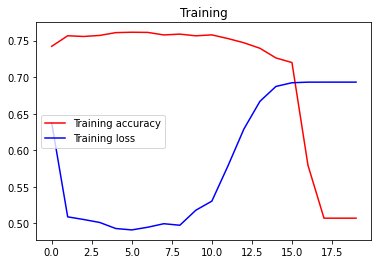

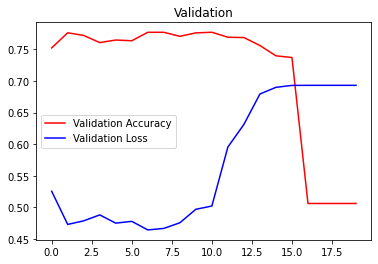

In [94]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

plt.close()


In [55]:
import os

os.environ['TENSORBOARD_BINARY'] = './logs/fit'

%reload_ext tensorboard
%tensorboard --logdir ./logs/fit 

ERROR: Failed to start './logs/fit' (set by the `TENSORBOARD_BINARY`
environment variable): [WinError 5] 액세스가 거부되었습니다

In [58]:

model_many_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(4096, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1024, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(512, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(128, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_many_layer.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history_many_layer = model_many_layer.fit(
    mm_train_x.reshape(-1, 1, num_features),
    train_y,
    epochs=20, 
    batch_size=32,
    validation_data=(mm_test_x.reshape(-1, 1, num_features), test_y),
    callbacks=[learning_rate_reduction, early_stop],
)

Epoch 1/20
1625/1625 [==============================] - 99s 59ms/step - loss: 109.5184 - accuracy: 0.6211 - val_loss: 1107.9113 - val_accuracy: 0.6695
Epoch 2/20
1625/1625 [==============================] - 90s 55ms/step - loss: 1.6411 - accuracy: 0.7238 - val_loss: 1.4259 - val_accuracy: 0.7058
Epoch 3/20
1625/1625 [==============================] - 86s 53ms/step - loss: 0.5676 - accuracy: 0.7541 - val_loss: 0.6844 - val_accuracy: 0.6552
Epoch 4/20
1625/1625 [==============================] - 87s 54ms/step - loss: 0.5337 - accuracy: 0.7589 - val_loss: 0.5284 - val_accuracy: 0.7698
Epoch 5/20
1625/1625 [==============================] - 91s 56ms/step - loss: 0.5033 - accuracy: 0.7697 - val_loss: 0.5302 - val_accuracy: 0.7693
Epoch 6/20
1625/1625 [==============================] - 92s 57ms/step - loss: 0.4746 - accuracy: 0.7751 - val_loss: 0.4614 - val_accuracy: 0.7752
Epoch 7/20
1625/1625 [==============================] - 93s 57ms/step - loss: 0.4633 - accuracy: 0.7781 - val_loss: 0.5